# 神奇的 Pandas

利用Pandas，我們可以分析time series，Pandas有兩種主要的資料結構：
* Series：一條時間序列
* DataFrame：很多的時間序列

假如您會使用Series，相信離精通DataFrame也不遠了！

所以接下來我們以Series開始講起！

## 創建

Series 的創建可以參考[Pandas 文檔](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html)
閱讀文檔是很重要的！課堂中不可能教您1000種Pandas的用法，甚至我也不可能全部被起來！
但藉由看文檔，我們可以即時找到需要的功能！

所以推薦大家多多練習喔！

以下我們先介紹常用的手法

In [38]:
# 身為碼農，我們要記得留意每一行註解喔！因為字裡行間可以有一些資訊，讓你少走冤枉路，更瞭解code在寫什麼！
# 什麼是註解呢？就是有 `#` 字後面接的字，都是註解喔！
# 不過通常註解都是英文，這邊為了方便閱讀，所以改成繁體中文XDD

# 首先呢，我們要把pandas給叫進來，等等才能使用
# 我們將pandas重新取名為pd（不取也是可以，但通常大家都會寫這行），因為這樣字比較少XDD，待會呼叫打的字比較少XD
import pandas as pd

# 接下來我們來創建一條序列，
# 創建序列要用`pd.Series`這個建構函式，其中的S為大寫代表我們要生成一個物件（建構子）！不然一般的function開頭都是小寫喔！
# `pd.Series` 中的第一個參數，我們要給它一個list，讓它把list轉換成 Series 喔！
s = pd.Series([1,2,3,4])

# 上面兩行等同於 s = pd.Series([1,2,3,4])


# 最後，我們在把s給print出來看看，s到底長什麼樣子
s
# 不用打print喔！因為jupyter 會自動印出每個block的最後一航程式

0    1
1    2
2    3
3    4
dtype: int64

跑出結果了！發現有兩列數字（columns）
* 第一條columns顯示0～3，為index
* 第二條就是每個index所對應到的值

你可能會想說「疑？感覺不是跟list很像？為何要多此一舉呢？」
接下來就不一樣囉！我們來做一條time series

In [39]:
date = pd.date_range('20180101', periods=6)
s = pd.Series([1,2,3,4,5,6], index=date)
s

2018-01-01    1
2018-01-02    2
2018-01-03    3
2018-01-04    4
2018-01-05    5
2018-01-06    6
Freq: D, dtype: int64

每個時間都對應到一個值，這就是傳說中的time series了！

接下來，我們也可以直接創造全部都是0的time series喔！只要把list換成一個任意數字就可以了：

In [40]:
s = pd.Series(2, index=date)
s

2018-01-01    2
2018-01-02    2
2018-01-03    2
2018-01-04    2
2018-01-05    2
2018-01-06    2
Freq: D, dtype: int64

接下來，我們就來看看，如何把time series其中的值給找出來！

## 查找

In [41]:
# 建立一個 time series
date = pd.date_range('20180101', periods=6)
s = pd.Series([1,2,3,4,5,6], index=date)

# 查找
s.loc['20180104']

4

In [42]:
s.loc['20180102':'2018-01-04']

2018-01-02    2
2018-01-03    3
2018-01-04    4
Freq: D, dtype: int64

In [43]:
s.iloc[1]
# iloc 用第幾個來查找

2

In [44]:
s.iloc[1:5]

2018-01-02    2
2018-01-03    3
2018-01-04    4
2018-01-05    5
Freq: D, dtype: int64

以上四種方式，大家搞清楚了嗎？

既然可以查找，那接下來，我們就來修改一下序列吧！

## 修改

In [45]:
l = [1,2,3,4,5,6]
date_index = pd.date_range('20180101', periods=6)

s = pd.Series(l, index=date_index)
s

2018-01-01    1
2018-01-02    2
2018-01-03    3
2018-01-04    4
2018-01-05    5
2018-01-06    6
Freq: D, dtype: int64

In [46]:
print(s)
# s.max()
#s.min()
s.mean()     # 平均
# s.std()   # 標準差

2018-01-01    1
2018-01-02    2
2018-01-03    3
2018-01-04    4
2018-01-05    5
2018-01-06    6
Freq: D, dtype: int64


3.5

In [47]:
print(s)
print(s.cumsum())      # 每一個都累加前面的
print(s.cumprod())      # 每一個都壘乘前面的

2018-01-01    1
2018-01-02    2
2018-01-03    3
2018-01-04    4
2018-01-05    5
2018-01-06    6
Freq: D, dtype: int64
2018-01-01     1
2018-01-02     3
2018-01-03     6
2018-01-04    10
2018-01-05    15
2018-01-06    21
Freq: D, dtype: int64
2018-01-01      1
2018-01-02      2
2018-01-03      6
2018-01-04     24
2018-01-05    120
2018-01-06    720
Freq: D, dtype: int64


In [48]:
print(s)
print("-------")
print(s.rolling(2).sum() )   #移動窗格(類似前多少個) 大小為2，且數字加起來，第一個因為沒有前一個所以為NaN
print("-------")
print(s.rolling(2).max())
print("-------")
print(s.rolling(2).min())
print("-------")
print(s.rolling(2).mean())
print("-------")
print(s.rolling(2).std())     # 每前2個的標準差

2018-01-01    1
2018-01-02    2
2018-01-03    3
2018-01-04    4
2018-01-05    5
2018-01-06    6
Freq: D, dtype: int64
-------
2018-01-01     NaN
2018-01-02     3.0
2018-01-03     5.0
2018-01-04     7.0
2018-01-05     9.0
2018-01-06    11.0
Freq: D, dtype: float64
-------
2018-01-01    NaN
2018-01-02    2.0
2018-01-03    3.0
2018-01-04    4.0
2018-01-05    5.0
2018-01-06    6.0
Freq: D, dtype: float64
-------
2018-01-01    NaN
2018-01-02    1.0
2018-01-03    2.0
2018-01-04    3.0
2018-01-05    4.0
2018-01-06    5.0
Freq: D, dtype: float64
-------
2018-01-01    NaN
2018-01-02    1.5
2018-01-03    2.5
2018-01-04    3.5
2018-01-05    4.5
2018-01-06    5.5
Freq: D, dtype: float64
-------
2018-01-01         NaN
2018-01-02    0.707107
2018-01-03    0.707107
2018-01-04    0.707107
2018-01-05    0.707107
2018-01-06    0.707107
Freq: D, dtype: float64


In [49]:
print(s)
# s + 1      #各自做處理
# s - 1
#s * 2
#s / 2
#s > 3
s < 3

2018-01-01    1
2018-01-02    2
2018-01-03    3
2018-01-04    4
2018-01-05    5
2018-01-06    6
Freq: D, dtype: int64


2018-01-01     True
2018-01-02     True
2018-01-03    False
2018-01-04    False
2018-01-05    False
2018-01-06    False
Freq: D, dtype: bool

## 繪圖

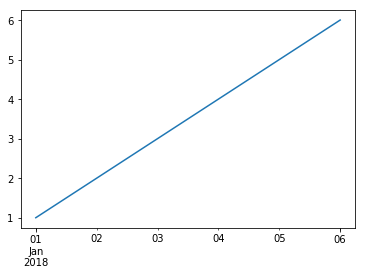

In [50]:
%matplotlib inline
s.plot()


## 綜合應用！

In [56]:
s > 3

2018-01-01    False
2018-01-02    False
2018-01-03    False
2018-01-04     True
2018-01-05     True
2018-01-06     True
Freq: D, dtype: bool

In [52]:
# 將該true false table存起
larger_than_3 = s > 3
s.loc[larger_than_3]    # 此為把該boolean表放入，
# s.loc[s > 3]

2018-01-04    4
2018-01-05    5
2018-01-06    6
Freq: D, dtype: int64

In [53]:
s.loc[larger_than_3] = s.loc[larger_than_3] + 1   # 如果本cell 一職執行，匯一職加
s

2018-01-01    1
2018-01-02    2
2018-01-03    3
2018-01-04    5
2018-01-05    6
2018-01-06    7
Freq: D, dtype: int64

接下來你會看到一串可怕的運算，但別擔心，我們把它拆解開來看！
* 從頭開始讀
* 遇到會先算

In [60]:
temp = s.rolling(2).sum()
temp

2018-01-01     NaN
2018-01-02     3.0
2018-01-03     5.0
2018-01-04     8.0
2018-01-05    11.0
2018-01-06    13.0
Freq: D, dtype: float64

In [63]:
temp2 = temp.cumsum()    # 將上面每次累加
temp2

2018-01-01     NaN
2018-01-02     3.0
2018-01-03     8.0
2018-01-04    16.0
2018-01-05    27.0
2018-01-06    40.0
Freq: D, dtype: float64

In [55]:
(s.rolling(2).sum().cumsum() + 1).max()    # +1後取最大值

41.0

In [64]:
print(s)


# 在跑出它之前，先用手算算看
# 究竟會跑出多少呢？
((s + 2).cumprod() + 4).min()

2018-01-01    1
2018-01-02    2
2018-01-03    3
2018-01-04    5
2018-01-05    6
2018-01-06    7
Freq: D, dtype: int64


7

### 習題

假設某小明體重從'2018-01-01'為60公斤，由於在'2018-01-03'吃太多，導致隔天起床發現變重5公斤，

請畫出小明體重的time series

2018-01-01    60
2018-01-02    60
2018-01-03    60
2018-01-04    65
2018-01-05    65
2018-01-06    65
2018-01-07    65
2018-01-08    65
2018-01-09    65
2018-01-10    65
Freq: D, dtype: int64


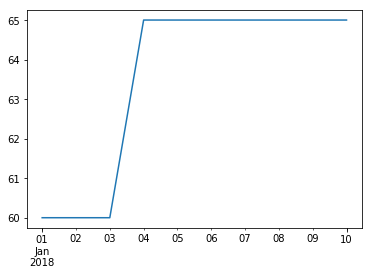

In [69]:
weight = pd.Series(60, index=pd.date_range('2018-01-01', periods=10))
weight.loc['2018-01-04':] += 5
print(weight)
#weight = pd.Series(60, index=pd.date_range('2018-01-01', periods=6))
#weight.loc['2018-01-04':] += 5
#weight

weight.plot()

# DataFrame 介紹！

DataFrame 基本上，可以想像是很多的time series，

我們剛剛所學，都是修改其中一條 Series，但我們藉由dataframe，就能以相同的function，直接修改多個Series喔！

In [ ]:
s1 = pd.Series([1,2,3,4,5,6], index=date)
s2 = pd.Series([5,6,7,8,9,10], index=date)
s3 = pd.Series([11,12,5,7,8,2], index=date)

dictionary = {
    'c1': s1,
    'c2': s2,
    'c3': s3,
}

df = pd.DataFrame(dictionary)
df

In [ ]:
%matplotlib inline
df.plot()

## 選取

我們選取方式，幾乎跟剛剛一模一樣：

In [ ]:
df.loc['2018-01-02']

In [ ]:
df.iloc[1]

In [ ]:
df.loc['2018-01-02':'2018-01-05', ['c1', 'c2']]

In [ ]:
df.iloc[1:4, [0, 1]]

In [ ]:
df.cumsum()

In [ ]:
df.cumprod()

In [ ]:
df.rolling(2).mean()

大家會發現，就是每條序列都執行一次原本series的功能而已！所以dataframe就這麼快速的教完囉！

學都學不完，我也有一堆function沒有用過呀！所以還是建議大家在寫code時，搭配doc（文檔）服用喔！

下面就是DataFrame才有的功能囉！

In [ ]:
df['c3']

In [ ]:
print(df)
df.cumsum(axis=1)